### Plotting the alignability of centrolign with respect to distance from the CDR

In [21]:
import pandas as pd
import os
import glob

### Chr 11 test case 

In [ ]:
import pandas as pd
import glob
import os

import pandas as pd
import glob
import os

def read_bedtools_subset(bed_dir):
    dfs = []

    bed_files = glob.glob(os.path.join(bed_dir, "*.bed"))

    for bed in bed_files:
        df = pd.read_csv(
            bed,
            sep="\t",
            header=None,
            usecols=[0, 1, 2, 3, 13],   # cols 1,2,3,4,13 (1-based)
            names=["contig", "start", "end", "prop_aligned", "dist_to_cdr"]
        )
        df["source_file"] = os.path.basename(bed)  # optional
        dfs.append(df)

    return pd.concat(dfs, ignore_index=True)



In [28]:
bed_dir = "/private/groups/patenlab/mira/windowed_alignment_beds_asm_coords/CDR_distance"
df = read_bedtools_subset(bed_dir)

print(df.head())
print(df.shape)


                 contig     start       end  prop_aligned  dist_to_cdr  \
0  HG02514#2#CM098752.1  50767034  50767084      0.928361           -1   
1  HG02514#2#CM098752.1  50767084  50767134      0.721311           -1   
2  HG02514#2#CM098752.1  50767134  50767184      0.721311           -1   
3  HG02514#2#CM098752.1  50767184  50767234      0.721311           -1   
4  HG02514#2#CM098752.1  50767234  50767284      0.721148           -1   

                                 source_file  
0  HG02514.2.windowed_alignment.CDR_dist.bed  
1  HG02514.2.windowed_alignment.CDR_dist.bed  
2  HG02514.2.windowed_alignment.CDR_dist.bed  
3  HG02514.2.windowed_alignment.CDR_dist.bed  
4  HG02514.2.windowed_alignment.CDR_dist.bed  
(8372072, 6)


/data/tmp/ipykernel_3299789/2996305095.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_avg = df_plot.groupby("bin")["prop_aligned"].mean().reset_index()


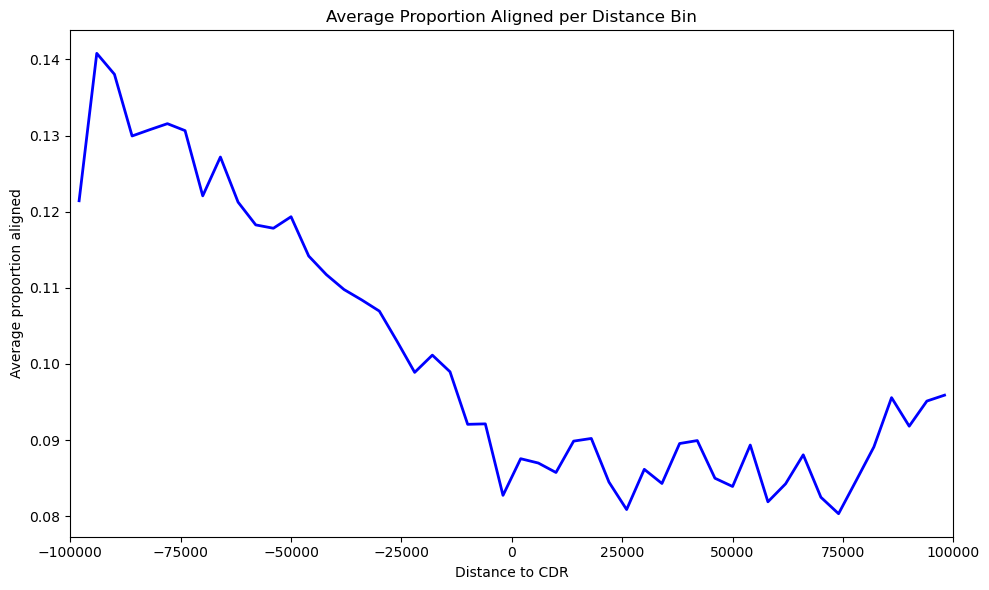

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter invalid distances and restrict to -100k to +100k
df_plot = df[(df["dist_to_cdr"] != -1) &
             (df["dist_to_cdr"] >= -100_000) &
             (df["dist_to_cdr"] <= 100_000)].copy()

# Define bins
num_bins = 50
bins = np.linspace(-100_000, 100_000, num_bins + 1)

# Bin the distances
df_plot["bin"] = pd.cut(df_plot["dist_to_cdr"], bins=bins, include_lowest=True)

# Compute average proportion aligned per bin
bin_avg = df_plot.groupby("bin")["prop_aligned"].mean().reset_index()

# Get bin centers for plotting
bin_avg["bin_center"] = bin_avg["bin"].apply(lambda x: x.mid)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(bin_avg["bin_center"], bin_avg["prop_aligned"], color="blue", linewidth=2)
plt.xlabel("Distance to CDR")
plt.ylabel("Average proportion aligned")
plt.title("Average Proportion Aligned per Distance Bin")
plt.xlim(-100_000, 100_000)
plt.tight_layout()
plt.show()

